## Visualizing Statistical Relationships with Seaborn

In [3]:
import warnings

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from openbb import obb

In [5]:
warnings.filterwarnings("ignore")
obb.user.preferences.output_type = "dataframe"

Fetches historical price data for "AAPL" and "SPY" starting from 2020-01-01 using the "yfinance" provider and pivots the data

In [6]:
data = obb.equity.price.historical(
    ["AAPL", "SPY"], start_date="2020-01-01", provider="yfinance"
).pivot(columns="symbol", values="close")

Calculates the percentage change in prices and drops any NaN values

In [7]:
returns = data.pct_change(fill_method=None).dropna()

Resets the index of 'returns'

In [8]:
returns = returns.reset_index()

Melts the 'returns' DataFrame for easy plotting

In [9]:
melted = pd.melt(
    returns,
    id_vars=["date"],
    value_vars=["AAPL"],
    var_name="stock",
    value_name="returns",
)

Adds a 'month' column to the melted DataFrame

In [10]:
melted["month"] = pd.to_datetime(melted.date).dt.to_period("M")

Creates a boxplot of returns by month

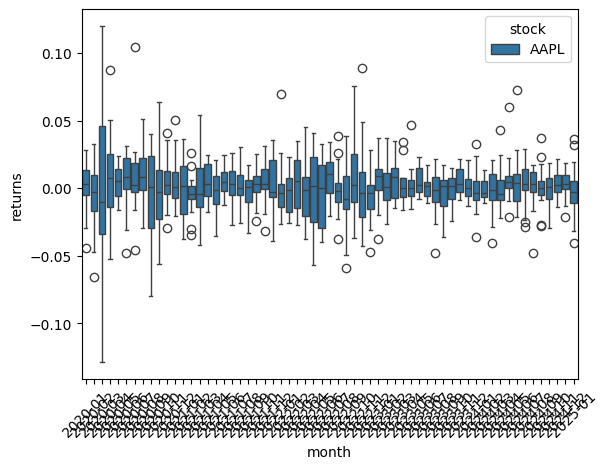

In [11]:
g = sns.boxplot(x="month", y="returns", hue="stock", data=melted)
g.set_xticklabels(melted["month"].unique(), rotation=45);

Creates a jointplot of "SPY" returns versus "AAPL" returns with a regression line

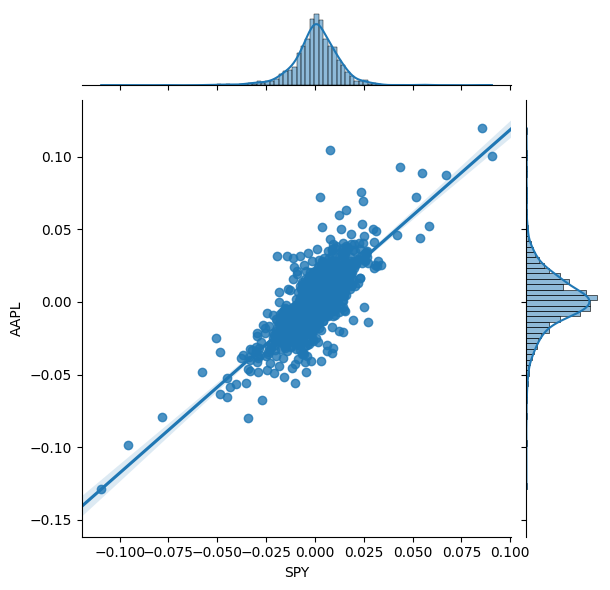

In [12]:
g = sns.jointplot(
    x="SPY",
    y="AAPL",
    data=returns,
    kind="reg",
    truncate=False,
)

Fetches the Dow Jones Industrial Average data from Wikipedia

In [13]:
dji = pd.read_html("https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")[1]

Fetches historical price data for the DJI components starting from 2020-01-01 using the "yfinance" provider and pivots the data

In [14]:
dji_data = (
    obb.equity.price.historical(
        dji.Symbol, start_date="2020-01-01", provider="yfinance"
    )
).pivot(columns="symbol", values="close")

AttributeError: 'DataFrame' object has no attribute 'Symbol'

Calculates the percentage change in prices and drops any NaN values for the DJI data

In [24]:
dji_returns = dji_data.pct_change(fill_method=None).dropna()

Computes the correlation matrix for the DJI returns

In [25]:
corr = dji_returns.corr()

Generates a mask for the upper triangle of the correlation matrix

In [26]:
mask = np.triu(np.ones_like(corr, dtype=bool))

Generates a custom diverging colormap

In [27]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

Draws the heatmap with the mask and correct aspect ratio

<Axes: xlabel='symbol', ylabel='symbol'>

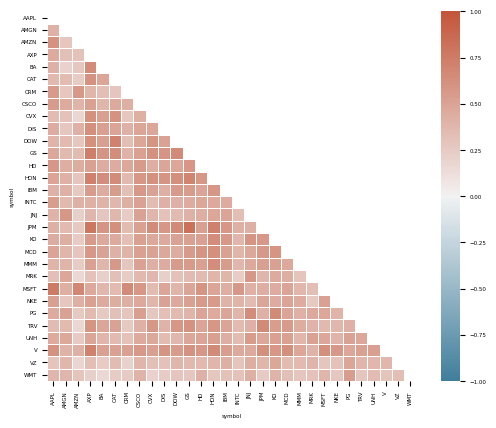

In [28]:
plt.rcParams["font.size"] = 4
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmin=-1.0,
    vmax=1.0,
    center=0,
    square=True,
    linewidths=0.5,
)

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.